<h2><center>Exploratory Data Analysis<center><b>

<b>Task 1: Perform EDA<b>

In [322]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h3>Customers Dataset Analysis

In [323]:
#Loading the Customers dataset
customers = pd.read_csv('Customers.csv')


In [324]:

print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [325]:
print(customers.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


-> Customers dataset contains no null values

In [326]:
print(customers.describe())

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


Unique Customers:<br>
-> The dataset contains 200 unique customers (CustomerID and CustomerName both have 200 unique values). This indicates no duplicates in customer identification or names.<br>

Regions Distribution:<br>
-> There are four unique regions.
-> "South America" is the most common region, with 59 customers located there. This could suggest that a significant    portion of the customer base is concentrated in South America.<br>

Signup Dates:<br>
-> There are 179 unique signup dates, meaning some customers share the same signup date.
-> The most common signup date is 2024-11-11, with 3 customers registering on that date.<br>

Customer Frequency:<br>
-> Both CustomerID and CustomerName have a frequency of 1 for their top value. This confirms each customer is unique in the dataset.

In [327]:
#printing first five rows
print(customers.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


<h3>Visualizations : Customers Dataset

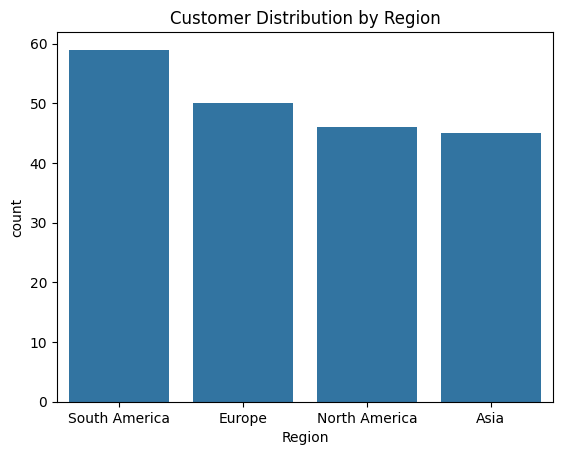

In [328]:
# Count of customers by region
sns.countplot(x='Region', data=customers, order=customers['Region'].value_counts().index)
plt.title('Customer Distribution by Region')
plt.show()

From this bar graph it is clear that<br>

-> South America has the highest number of customers<br>
-> Europe has the second-highest number of customers<br>
-> North America and Asia have relatively similar and lower customer counts<br>

In summary, the customer base is concentrated in South America and Europe, with South America having a clear lead. North America and Asia represent smaller, relatively similar portions of the customer distribution.

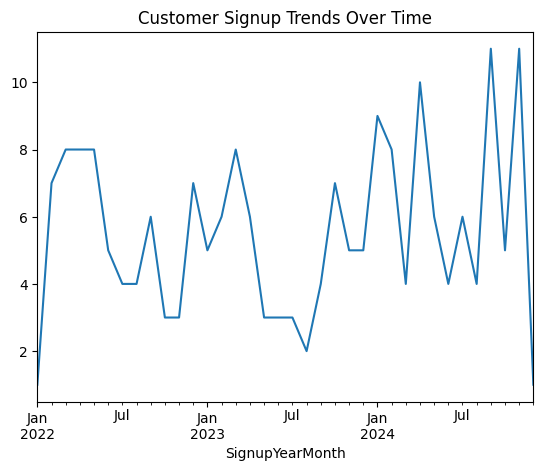

In [329]:
# Signup trends
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYearMonth'] = customers['SignupDate'].dt.to_period('M')
customers['SignupYearMonth'].value_counts().sort_index().plot(kind='line')
plt.title('Customer Signup Trends Over Time')
plt.show()

The signup trend shows initial growth in early 2022, stabilization around 8 signups/month by mid-2022, and a subsequent decline with fluctuations. Peaks occur in January 2023, early 2024, and late 2024, while lows are seen mid-2022 and mid-2023. Overall, the trend oscillates without a clear long-term upward or downward direction.

<h3>Products Dataset Analysis

In [330]:
#Loading the Prooducts dataset
products = pd.read_csv('Products.csv')

In [331]:
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [332]:
print(products.head())

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [333]:
print(products.isnull().sum())

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


Products dataset contains no null values

In [334]:
print(products.describe())

            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


Price Range:<br>
-> The prices range from a minimum of 16.08 to a maximum of 497.76.<br>

Average Price:<br>
-> The average (mean) price is 267.55, suggesting a mid-tier pricing overall.<br>

Price Distribution:<br>
-> The standard deviation of 143.22 indicates significant variation in product prices.<br>
-> 25% of products are priced below 147.77.<br>
-> 50% (median) are priced below 292.88, meaning most products are skewed toward the higher price range.<br>
-> 75% of products are priced below 397.09.<br>

Outliers:<br>
-> The dataset has a relatively low minimum price (16.08), which could be an outlier or a budget product.<br>
-> The maximum price (497.76) is close to the 75th percentile, suggesting a smaller number of premium-priced products.<br>

<h3>Visualizations : Products Dataset

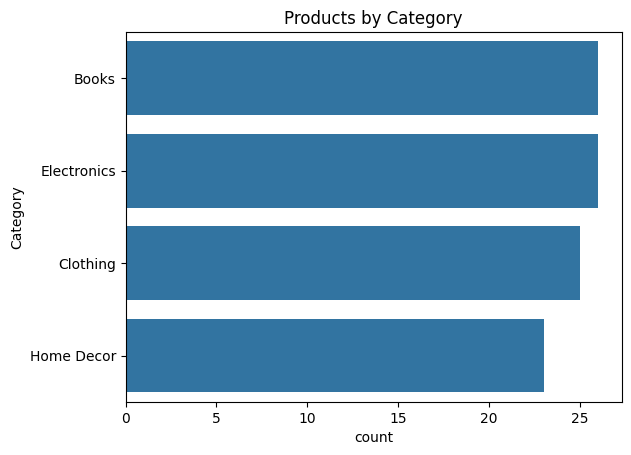

In [335]:
# Products by category
sns.countplot(y='Category', data=products, order=products['Category'].value_counts().index)
plt.title('Products by Category')
plt.show()

From the above graph it is clear that<br>
-> Books are the most popular category<br>
-> Electronics are a close second<br>
-> Clothing is a strong contender<br>
-> Home Decor is the least represented<br>

Overall, the product range is diverse but with a lean towards books and electronics. The near-equal representation of these two categories suggests they are core to the business, while clothing maintains a strong presence. Home decor, while less represented, still contributes to a diverse product portfolio.

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


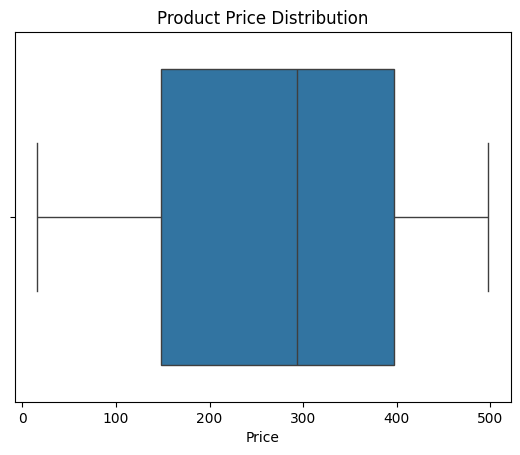

In [336]:
# Price distribution
sns.boxplot(x='Price', data=products)
plt.title('Product Price Distribution')
plt.show()

-> The box plot shows that 50% of products are priced between approximately around 175 and 400.

<H3>Transactions Dataset Analysis

In [337]:
#Loading transactions dataset
transactions = pd.read_csv('Transactions.csv')

In [338]:
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


In [339]:
print(transactions.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [340]:
print(transactions.isnull().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


Transactions dataset contains no null values

In [341]:
print(transactions.describe())

          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


1. Quantity:<br>
-> Quantities range from 1 to 4, suggesting limited options for quantity per transaction.<br>
-> The mean quantity is 2.54, indicating customers typically purchase 2–3 units per transaction.<br>
-> 75% of transactions involve 2–4 units.<br>

2. Price:<br>
-> Prices range from 16.08 (minimum) to 497.76 (maximum).<br>
-> The mean price is 272.55, with most products falling within the mid-range price tier.<br>
-> The 25th percentile is 147.95, and the 75th percentile is 404.40, showing a broad price spectrum.<br>

3. Total Value:<br>
-> Total transaction values range from 16.08 to 1991.04.<br>
-> The mean total value is 689.99, indicating a significant average transaction size.<br>
-> Total value is influenced by both quantity and price, with high-value transactions likely involving higher quantities or premium-priced items.<br>
-> 25% of transactions are below 295.30, indicating a mix of smaller transactions.<br>
-> 50% (median) of transactions are below 588.88.<br>
-> 75% of transactions exceed 1011.66, indicating frequent high-value purchases.<br>

4. Trends:<br>
-> Customers primarily purchase 2–4 units at a time.<br>
-> Most transactions fall in the mid-to-high value range, driven by moderately priced products and higher quantities.<br>

In [342]:

#Adding two columns such as 'TransactionDateOnly' and 'TransactionTimeOnly' for geting more information

# Convert 'TransactionDate' column to datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Add new columns
transactions['TransactionDateOnly'] = transactions['TransactionDate'].dt.date
transactions['TransactionTimeOnly'] = transactions['TransactionDate'].dt.time

# Display the updated DataFrame
print(transactions.head())


  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue   Price TransactionDateOnly TransactionTimeOnly  
0      300.68  300.68          2024-08-25            12:38:23  
1      300.68  300.68          2024-05-27            22:23:54  
2      300.68  300.68          2024-04-25            07:38:55  
3      601.36  300.68          2024-03-26            22:55:37  
4      902.04  300.68          2024-03-21            15:10:10  


In [343]:
print(transactions.isnull().sum())

TransactionID          0
CustomerID             0
ProductID              0
TransactionDate        0
Quantity               0
TotalValue             0
Price                  0
TransactionDateOnly    0
TransactionTimeOnly    0
dtype: int64


In [344]:
#Find the date range of transactions
print(f"Transaction Date Range: {transactions['TransactionDateOnly'].min()} to {transactions['TransactionDateOnly'].max()}")


Transaction Date Range: 2023-12-30 to 2024-12-28


<h3>Visualizations : Transactions Dataset

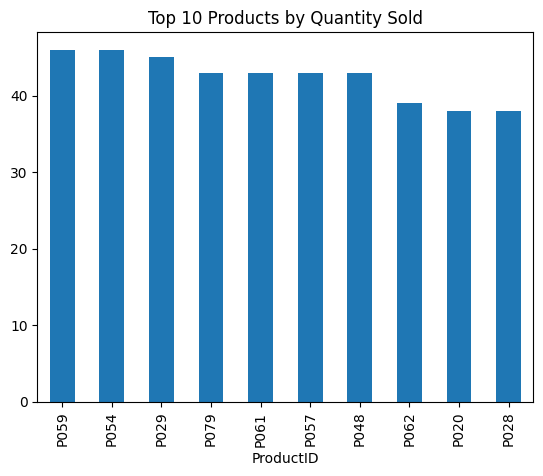

In [345]:
# Top products by quantity sold
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar')
plt.title('Top 10 Products by Quantity Sold')
plt.show()




This bar chart shows the top 10 products by quantity sold. <br>

-> Top Performers: Products P059 and P054 are the clear leaders in terms of quantity sold, with P054 having a slight edge. These products are likely very popular or essential items.<br>
-> Strong Competitors: Products P029, P079, P061, P057, and P048 also show strong sales figures, indicating consistent demand for these items.<br>
-> Moderate Performers: Products P062, P020, and P028 have relatively lower sales compared to the top performers but still rank within the top 10.<br>



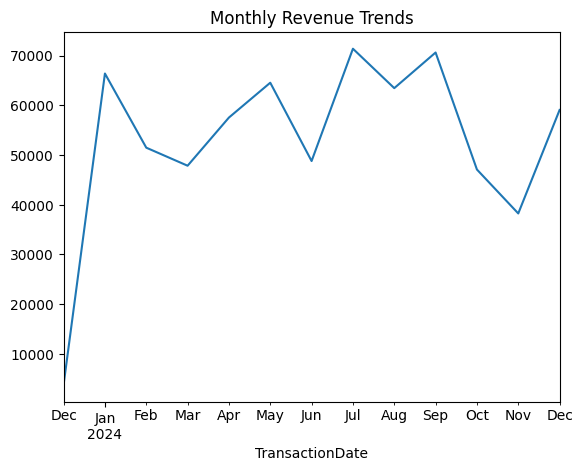

In [346]:
# Revenue trends
transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum().plot()
plt.title('Monthly Revenue Trends')
plt.show()

The line chart displays:<br>
-> There is an initial sharp increase in revenue from December 2023 to January 2024.<br>
-> This is followed by a fluctuating pattern with peaks and troughs throughout the year.<br>
-> Overall, the revenue appears to be trending upwards with some seasonal fluctuations.<br>

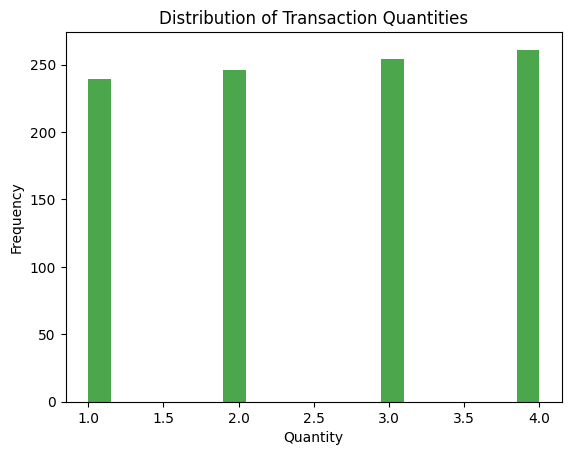

In [347]:
# Plot histogram of quantities
transactions['Quantity'].plot(kind='hist', bins=20, color='green', alpha=0.7)
plt.title('Distribution of Transaction Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()



This histogram shows the distribution of transaction quantities, <br>
-> Most Common Quantities:  It looks like  mostly 3 or 4 quantities are purchased in a transaction. <br>
-> Even Distribution: The distribution is quite even across those four quantities. This suggests there isn't a strong tendency towards buying just one item or a larger number of items per transaction.<br>
-> No Purchases Above 4: It seems there are no transactions in the data where more than 4 items were purchased at once.

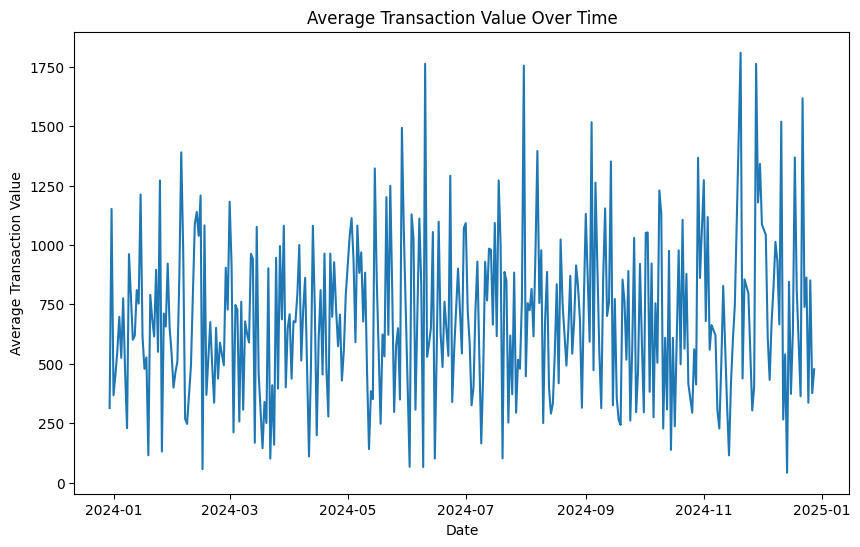

In [348]:
# Group by date to get the average total value per day
average_value_per_day = transactions.groupby('TransactionDateOnly')['TotalValue'].mean()

# Plot average value over time
average_value_per_day.plot(kind='line', figsize=(10, 6))
plt.title('Average Transaction Value Over Time')
plt.xlabel('Date')
plt.ylabel('Average Transaction Value')
plt.show()


From this we can see that throught the year the Total Value is fluctuating

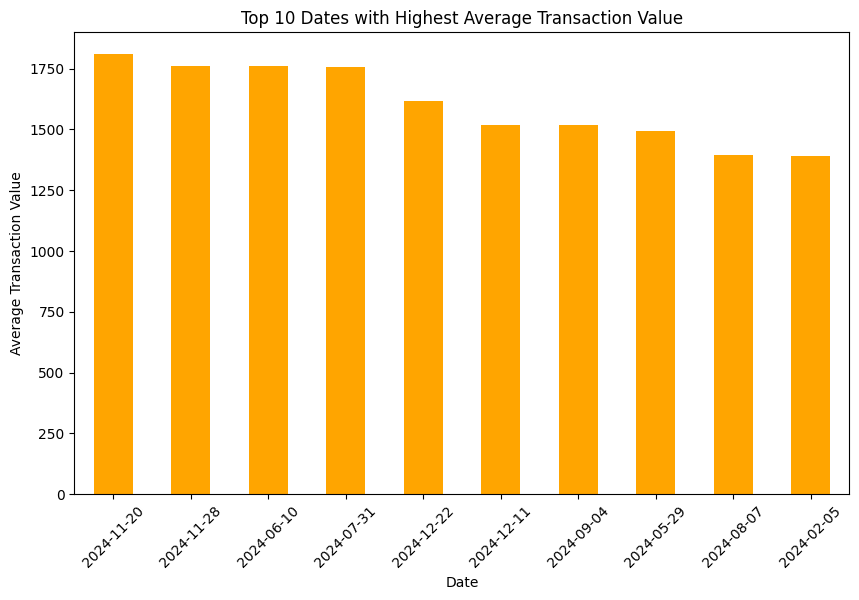

In [349]:


# Group by date to get the average total value per day
average_value_per_day = transactions.groupby('TransactionDateOnly')['TotalValue'].mean()

# Sort by average value in descending order and select the top 10
top_10_dates = average_value_per_day.sort_values(ascending=False).head(10)

# Plot a bar chart for top 10 dates with highest average transaction value
plt.figure(figsize=(10, 6))
top_10_dates.plot(kind='bar', color='orange')
plt.title('Top 10 Dates with Highest Average Transaction Value')
plt.xlabel('Date')
plt.ylabel('Average Transaction Value')
plt.xticks(rotation=45)
plt.show()


The major insights from the above  bar chart is:<br>
-> The chart highlights the top 10 dates where the average transaction value was the highest.<br>
-> There's significant variation in the average transaction value across these dates, with some dates showing much higher values than others.<br>
-> The dates span from February 2024 to December 2024, suggesting that high average transaction values can occur throughout the year.

Top 10 Hours with Most Transactions:
TransactionHour
14    60
16    51
3     51
9     48
17    47
22    46
7     45
19    45
4     44
0     42
dtype: int64


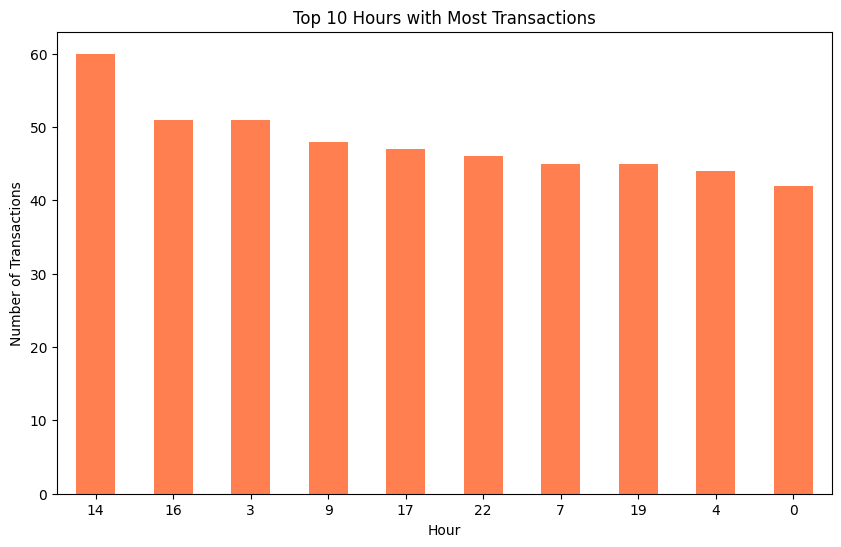

In [350]:
# Extract the hour from TransactionTimeOnly
transactions['TransactionHour'] = pd.to_datetime(transactions['TransactionDate']).dt.hour

# Count transactions per hour
hourly_transactions = transactions.groupby('TransactionHour').size()

# Sort hours by the number of transactions in descending order
top_hours = hourly_transactions.sort_values(ascending=False).head(10)

# Display top 10 hours
print("Top 10 Hours with Most Transactions:")
print(top_hours)

# Plot the top 10 hours
plt.figure(figsize=(10, 6))
top_hours.plot(kind='bar', color='coral')
plt.title('Top 10 Hours with Most Transactions')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()


This bar chart shows the top 10 hours of the day with the most transactions:<br>

-> Peak Activity:  The hour with the most transactions appears to be 14:00 (2 PM), followed closely by 16:00 (4 PM). This suggests that mid-afternoon is a very busy time.<br>

-> Consistent Activity:  Transaction activity seems fairly consistent across several hours, with 3 AM, 9 AM, 17:00 (5 PM), 22:00 (10 PM), 7 AM, 19:00 (7 PM), 4 AM, and midnight all showing a significant number of transactions.<br>

-> Spread Throughout the Day:  Transactions are spread throughout the day, with busy periods in the early morning, mid-morning, afternoon, evening, and even late at night. This might indicate that the business operates in a time zone where customers are active at various times or that it caters to customers across different time zones.<br>

<h3>Combined Dataset Analysis

In [351]:
# Merge datasets
combined_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Display the first few rows of combined data
print(combined_data.head())

# General Information
print("\nGeneral Information:")
print(combined_data.info())




  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x TransactionDateOnly TransactionTimeOnly  \
0      300.68   300.68          2024-08-25            12:38:23   
1      300.68   300.68          2024-05-27            22:23:54   
2      300.68   300.68          2024-04-25            07:38:55   
3      601.36   300.68          2024-03-26            22:55:37   
4      902.04   300.68          2024-03-21            15:10:10   

   TransactionHour     CustomerName         Region SignupDate SignupYearMonth  \
0               12   Andrea Jenkins         Europe 2022-12-03         2022-12   
1               22  

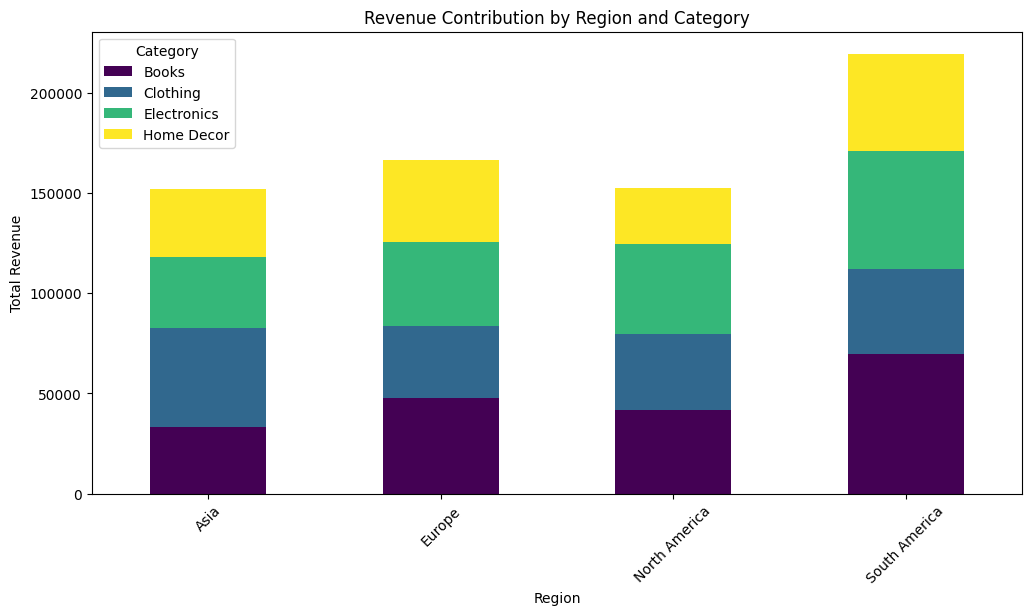

In [352]:
# Group by Region and Category to get total sales
region_category_sales = combined_data.groupby(['Region', 'Category'])['TotalValue'].sum().unstack()

# Plot a stacked bar chart
region_category_sales.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Revenue Contribution by Region and Category')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()


The stacked bar chart highlights regional and category contributions to overall revenue. South America leads in revenue generation, followed closely by Europe, while Asia and North America contribute comparatively less. Across all regions, Books and Electronics are consistently strong revenue drivers, forming a significant portion of the total revenue. Clothing performs particularly well in South America and Europe, whereas Home Decor has a stronger presence in Europe and South America. These insights suggest variations in regional preferences and market focus, with South America and Europe emerging as key markets and Books and Electronics standing out as universally strong categories.

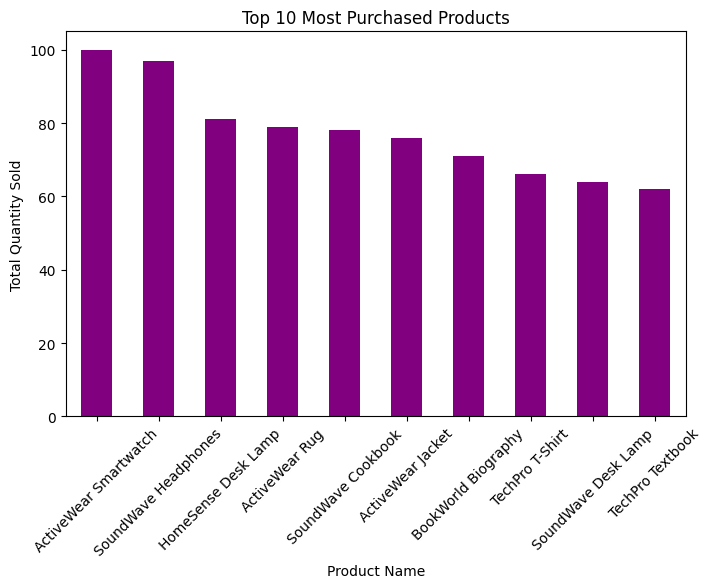

In [353]:


# Most Purchased Products
most_purchased_products = combined_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
most_purchased_products.plot(kind='bar', figsize=(8, 5), color='purple')
plt.title('Top 10 Most Purchased Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

The bar chart highlights the top 10 most purchased products, with "ActiveWear Smartwatch" and "Soundwave Headphones" leading in popularity. Strong performers include "HomeSense Desk Lamp," "ActiveWear Rug," "Soundwave Cookbook," and "ActiveWear Jacket." Products like "BookWorld Biography," "TechPro T-Shirt," "Soundwave Desk Lamp," and "TechPro Textbook" show consistent demand. The dominance of ActiveWear and Soundwave products suggests strong brand recognition and successful product lines.

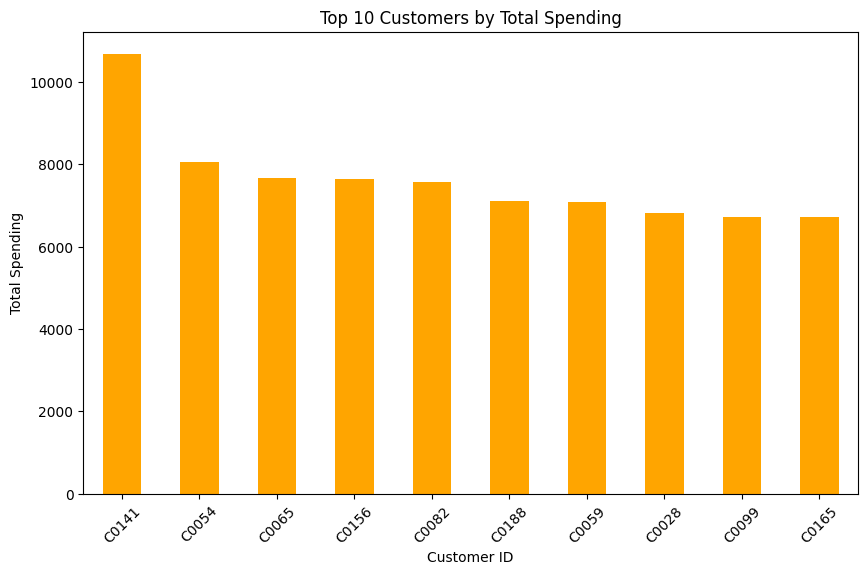

In [354]:
# Group by CustomerID and sum total sales
top_customers = combined_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)

# Plot top 10 customers
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='orange')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()


The bar chart shows the top 10 customers by total spending, with C0141 leading by a significant margin, followed by C0054 as another key contributor. Customers C0065, C0156, C0082, C0188, C0059, C0028, C0099, and C0165 also contribute substantially, with relatively even spending among them, excluding the top two. This highlights the importance of a few high-value customers while indicating a consistent spending pattern within the group.









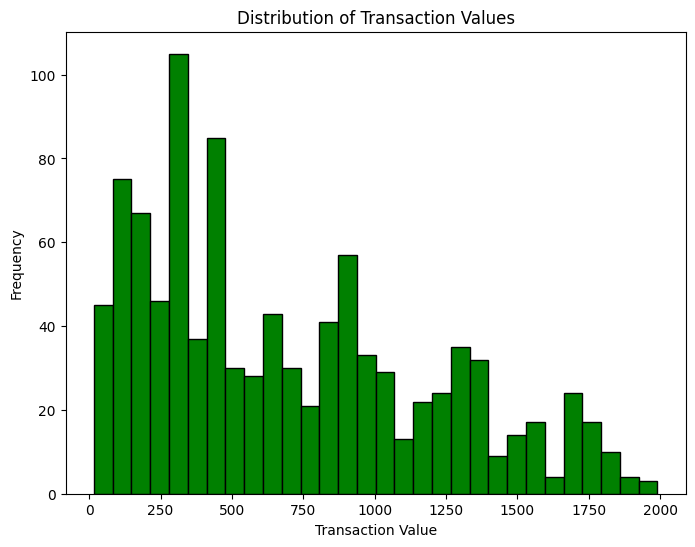

In [355]:
# Plot histogram of TotalValue
plt.figure(figsize=(8, 6))
plt.hist(combined_data['TotalValue'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Transaction Values')
plt.xlabel('Transaction Value')
plt.ylabel('Frequency')
plt.show()


The histogram reveals that most transactions fall between 100 and 500, indicating common purchase ranges. The right-skewed distribution suggests that while most transactions are lower in value, some higher-value transactions skew the data. Transaction values span from nearly 0 to 2000, reflecting varied spending habits. Peaks around 200-300 and 500-600 suggest these price points may represent popular product prices or common basket totals.







